<a href="https://colab.research.google.com/github/sgathai/dsc-data-serialization-lab/blob/master/TeFloVe_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data

In [ ]:
# Linking to drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Importing needed libraries for preprocessing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the drive
import os
os.chdir("/content/gdrive/Shared drives/Women_hack")

In [ ]:
# Filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading dataset
df = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [ ]:
df.head()

ID  gender  age  ... job_or_business  nature_of_work target
0  ID_00008683  Female   20  ...              No  Not applicable      0
1  ID_00061163  Female   42  ...  Not applicable       Permanent      0
2  ID_00071403  Female   86  ...              No  Not applicable      0
3  ID_00077803  Female   20  ...              No  Not applicable      0
4  ID_00086763  Female   26  ...              No  Not applicable      0

[5 rows x 21 columns]

In [ ]:
print("Train:",df.shape,"Test:",test.shape)

Train: (7736, 21) Test: (3316, 20)


In [ ]:
df.columns

Index(['ID', 'gender', 'age', 'race', 'dwelling', 'dwelling_type',
       'province_code', 'metro_code', 'psu', 'nationality', 'RTH',
       'marital_st', 'Lang_inside', 'Lang_outside', 'Education', 'lw_work',
       'lw_business', 'help_on_household', 'job_or_business', 'nature_of_work',
       'target'],
      dtype='object')

# Exploration

In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
df = df.drop(['ID','gender'],axis =1)
test = test.drop(['ID','gender'], axis =1)

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile2 = ProfileReport(test, title="Pandas Profiling Report")
profile2

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7736 entries, 0 to 7735
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                7736 non-null   int64 
 1   race               7736 non-null   object
 2   dwelling           7736 non-null   object
 3   dwelling_type      7736 non-null   object
 4   province_code      7736 non-null   object
 5   metro_code         7736 non-null   object
 6   psu                7736 non-null   int64 
 7   nationality        7736 non-null   object
 8   RTH                7736 non-null   object
 9   marital_st         7736 non-null   object
 10  Lang_inside        7736 non-null   object
 11  Lang_outside       7736 non-null   object
 12  Education          7736 non-null   object
 13  lw_work            7736 non-null   object
 14  lw_business        7736 non-null   object
 15  help_on_household  7736 non-null   object
 16  job_or_business    7736 non-null   object


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3316 entries, 0 to 3315
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                3316 non-null   int64 
 1   race               3316 non-null   object
 2   dwelling           3316 non-null   object
 3   dwelling_type      3316 non-null   object
 4   province_code      3316 non-null   object
 5   metro_code         3316 non-null   object
 6   psu                3316 non-null   int64 
 7   nationality        3316 non-null   object
 8   RTH                3316 non-null   object
 9   marital_st         3316 non-null   object
 10  Lang_inside        3316 non-null   object
 11  Lang_outside       3316 non-null   object
 12  Education          3316 non-null   object
 13  lw_work            3316 non-null   object
 14  lw_business        3316 non-null   object
 15  help_on_household  3316 non-null   object
 16  job_or_business    3316 non-null   object


In [ ]:
cat_columns = [ 'race', 'dwelling', 'dwelling_type',
       'province_code', 'metro_code', 'nationality', 'RTH',
       'marital_st', 'Lang_inside', 'Lang_outside', 'Education', 'lw_work',
       'lw_business', 'help_on_household', 'job_or_business', 'nature_of_work']

for i in cat_columns:
  df[i] = df[i].astype('category')
  test[i] = test[i].astype('category')

In [ ]:
df['target'] = df['target'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7736 entries, 0 to 7735
Columns: 151 entries, age to nature_of_work_Unspecified
dtypes: category(1), int64(2), uint8(148)
memory usage: 1.2 MB


In [ ]:
test.isnull().any()

age                  False
race                 False
dwelling             False
dwelling_type        False
province_code        False
metro_code           False
psu                  False
nationality          False
RTH                  False
marital_st           False
Lang_inside          False
Lang_outside         False
Education            False
lw_work              False
lw_business          False
help_on_household    False
job_or_business      False
nature_of_work       False
dtype: bool

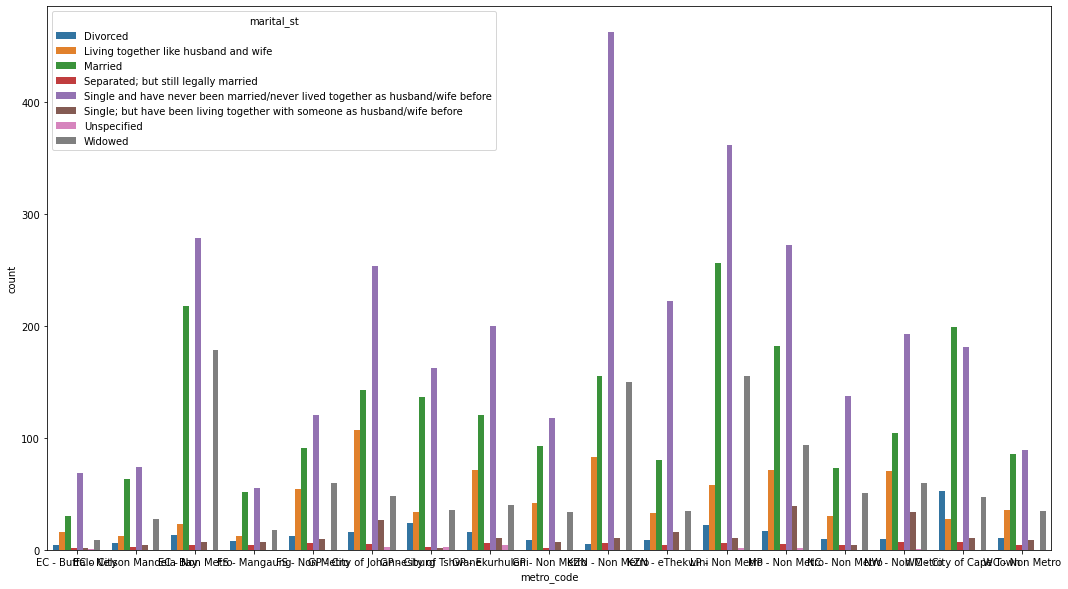

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x="metro_code", hue="marital_st", data=df)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

print(df.groupby(['target','metro_code'])['marital_st'].value_counts())

target  metro_code                 marital_st                                                                    
0       EC - Buffalo City          Single and have never been married/never lived together as husband/wife before     62
                                   Married                                                                            29
                                   Living together like husband and wife                                              14
                                   Widowed                                                                             9
                                   Divorced                                                                            4
                                   Separated; but still legally married                                                2
                                   Single; but have been living together with someone as husband/wife before           1
                                   Unsp

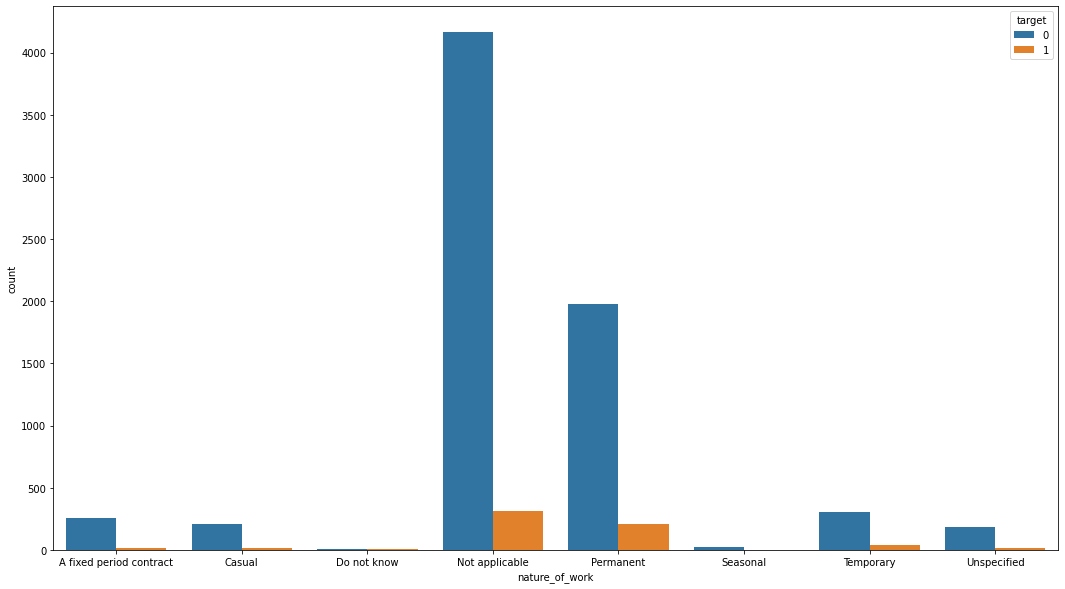

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x="nature_of_work", hue="target", data=df)

In [ ]:
print(df.groupby(['target'])['job_or_business'].value_counts())

target  job_or_business
0       No                 4161
        Not applicable     2820
        Unspecified          98
        Yes                  49
        Do not know           3
1       No                  309
        Not applicable      281
        Yes                   8
        Unspecified           7
Name: job_or_business, dtype: int64


In [ ]:
df[]

In [ ]:
df1 = pd.get_dummies(df, columns=cat_columns)
df1.head(1)

age       psu  ...  nature_of_work_Temporary  nature_of_work_Unspecified
0   20  66710095  ...                         0                           0

[1 rows x 157 columns]

In [ ]:
test = pd.get_dummies(test, columns=cat_columns)
test.head(1)

age       psu  ...  nature_of_work_Temporary  nature_of_work_Unspecified
0   23  36410104  ...                         0                           0

[1 rows x 150 columns]

In [ ]:
notintest = []
for i in df.columns:
  if i not in test.columns:
    notintest.append(i)
print(notintest)

['target', 'dwelling_Caravan/tent', 'Lang_inside_Khoi, Nama and San languages', 'Lang_inside_Sign language', 'lw_business_Do not know', 'help_on_household_Do not know', 'job_or_business_Do not know']


In [ ]:
df = df.drop(notintest[1:], axis=1)

In [ ]:
df.head(1)

age       psu  ...  nature_of_work_Temporary  nature_of_work_Unspecified
0   20  66710095  ...                         0                           0

[1 rows x 151 columns]

In [ ]:
cols = df.columns

Bivariate analysis

In [ ]:
for i in cols[4:]: #.groupby([''])
  print(df.groupby(['target'])[i].value_counts())

target  race_Coloured
0       0                6496
        1                 635
1       0                 540
        1                  65
Name: race_Coloured, dtype: int64
target  race_Indian/Asian
0       0                    6994
        1                     137
1       0                     603
        1                       2
Name: race_Indian/Asian, dtype: int64
target  race_White
0       0             6603
        1              528
1       0              548
        1               57
Name: race_White, dtype: int64
target  dwelling_Cluster house in complex
0       0                                    7059
        1                                      72
1       0                                     600
        1                                       5
Name: dwelling_Cluster house in complex, dtype: int64
target  dwelling_Dwelling/house or brick/concrete block structure on a separate stand or yard or farm
0       1                                                           

# Modeling

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 56kB/s 


In [ ]:
# Importing models
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier

# Parametric model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score, f1_score

from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Creating table to store the results
models ={'Model':['Logistic','LGBM','Cat boost','Decision Tree',
                  'Random Forest','Ada Boost','Gradient Boosting', 'Extra Trees'],
         'Accuracy':[0,0,0,0,0,0,0,0],
         'f1_score':[0,0,0,0,0,0,0,0],
         'AUC':[0,0,0,0,0,0,0,0]}

df_results = pd.DataFrame(models,columns=['Model','Accuracy','f1_score','AUC'])

def model_results(model_type, y_test_data, y_pred_data):
  index_val = df_results[df_results['Model']==model_type].index

  df_results.loc[index_val,'Accuracy']= accuracy_score(y_test_data, y_pred_data)
  df_results.loc[index_val,'f1_score']= f1_score(y_test_data, y_pred_data)
  df_results.loc[index_val,'AUC']= roc_auc_score(y_test_data, y_pred_data)

  return df_results

In [ ]:
# spliting the data, 70% train set and 30% val set
train_set, val_set = train_test_split(df,
                               test_size=0.30, random_state=2)

In [ ]:
# whole dataset
X_train_set = train_set.drop(["target"], axis=1) # feature columns
y_train_set = train_set["target"] # the label/target column

X_val_set = val_set.drop(["target"], axis=1)
y_val_set = val_set["target"]

In [ ]:
# Features selected
X_train_set = train_set[features] # feature columns
y_train_set = train_set["target"] # the label/target column

X_val_set = val_set[features]
y_val_set = val_set["target"]

In [ ]:
# Initializing logistic regression model
pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='sag'))

pipe.fit(X_train_set,y_train_set)

predict_1 = pipe.predict(X_val_set)

# Storing metrics for comparison later
model_results('Logistic',y_val_set, predict_1)

Model  Accuracy  f1_score       AUC
0           Logistic  0.603619  0.152855  0.551789
1               LGBM  0.922878  0.011050  0.500403
2          Cat boost  0.834554  0.168831  0.556370
3      Decision Tree  0.843602  0.108108  0.514903
4      Random Forest  0.911245  0.046296  0.505035
5          Ada Boost  0.624300  0.171103  0.582025
6  Gradient Boosting  0.614821  0.187273  0.612355
7        Extra Trees  0.909091  0.018605  0.495694

In [ ]:
model_2 = LGBMClassifier()

model_2.fit(X_train_set,y_train_set)

predict_2 = model_2.predict(X_val_set)

# Storing metrics for comparison later
model_results('LGBM',y_val_set, predict_2)

Model  Accuracy  f1_score       AUC
0           Logistic  0.603619  0.152855  0.551789
1               LGBM  0.737182  0.177898  0.577469
2          Cat boost  0.834554  0.168831  0.556370
3      Decision Tree  0.843602  0.108108  0.514903
4      Random Forest  0.911245  0.046296  0.505035
5          Ada Boost  0.624300  0.171103  0.582025
6  Gradient Boosting  0.614821  0.187273  0.612355
7        Extra Trees  0.909091  0.018605  0.495694

In [ ]:
model_3 = CatBoostClassifier(verbose=0)

model_3.fit(X_train_set,y_train_set)

predict_3 = model_3.predict(X_val_set)

# Storing metrics for comparison later
model_results('Cat boost',y_val_set, predict_3)

Model  Accuracy  f1_score       AUC
0           Logistic  0.603619  0.152855  0.551789
1               LGBM  0.737182  0.177898  0.577469
2          Cat boost  0.764326  0.192024  0.589380
3      Decision Tree  0.843602  0.108108  0.514903
4      Random Forest  0.911245  0.046296  0.505035
5          Ada Boost  0.624300  0.171103  0.582025
6  Gradient Boosting  0.614821  0.187273  0.612355
7        Extra Trees  0.909091  0.018605  0.495694

In [ ]:
model_4 = DecisionTreeClassifier()

model_4.fit(X_train_set,y_train_set)

predict_4 = model_4.predict(X_val_set)

# Storing metrics for comparison later
model_results('Decision Tree',y_val_set, predict_4)

Model  Accuracy  f1_score       AUC
0           Logistic  0.603619  0.152855  0.551789
1               LGBM  0.737182  0.177898  0.577469
2          Cat boost  0.764326  0.192024  0.589380
3      Decision Tree  0.853942  0.114883  0.520479
4      Random Forest  0.911245  0.046296  0.505035
5          Ada Boost  0.624300  0.171103  0.582025
6  Gradient Boosting  0.614821  0.187273  0.612355
7        Extra Trees  0.909091  0.018605  0.495694

In [ ]:
model_5 = RandomForestClassifier()

model_5.fit(X_train_set,y_train_set)

predict_5 = model_5.predict(X_val_set)

# Storing metrics for comparison later
model_results('Random Forest',y_val_set, predict_5)

Model  Accuracy  f1_score       AUC
0           Logistic  0.603619  0.152855  0.551789
1               LGBM  0.737182  0.177898  0.577469
2          Cat boost  0.764326  0.192024  0.589380
3      Decision Tree  0.853942  0.114883  0.520479
4      Random Forest  0.880655  0.091803  0.513074
5          Ada Boost  0.624300  0.171103  0.582025
6  Gradient Boosting  0.614821  0.187273  0.612355
7        Extra Trees  0.909091  0.018605  0.495694

In [ ]:
model_6 = AdaBoostClassifier(learning_rate=1.1, n_estimators=250)

model_6.fit(X_train_set,y_train_set)

predict_6 = model_6.predict(X_val_set)

# Storing metrics for comparison later
model_results('Ada Boost',y_val_set, predict_6)

Model  Accuracy  f1_score       AUC
0           Logistic  0.603619  0.152855  0.551789
1               LGBM  0.737182  0.177898  0.577469
2          Cat boost  0.764326  0.192024  0.589380
3      Decision Tree  0.853942  0.114883  0.520479
4      Random Forest  0.880655  0.091803  0.513074
5          Ada Boost  0.647135  0.171891  0.580708
6  Gradient Boosting  0.602327  0.173679  0.589259
7        Extra Trees  0.890564  0.099291  0.518418

In [ ]:
model_7 = GradientBoostingClassifier()

model_7.fit(X_train_set,y_train_set)

predict_7 = model_7.predict(X_val_set)

# Storing metrics for comparison later
model_results('Gradient Boosting',y_val_set, predict_7)

Model  Accuracy  f1_score       AUC
0           Logistic  0.603619  0.152855  0.551789
1               LGBM  0.737182  0.177898  0.577469
2          Cat boost  0.764326  0.192024  0.589380
3      Decision Tree  0.853942  0.114883  0.520479
4      Random Forest  0.880655  0.091803  0.513074
5          Ada Boost  0.603188  0.178412  0.597903
6  Gradient Boosting  0.602327  0.173679  0.589259
7        Extra Trees  0.909091  0.018605  0.495694

In [ ]:
model_8 = ExtraTreesClassifier()

model_8.fit(X_train_set,y_train_set)

predict_8 = model_8.predict(X_val_set)

# Storing metrics for comparison later
results2 = model_results('Extra Trees',y_val_set, predict_8)
results
results2

Model  Accuracy  f1_score       AUC
0           Logistic  0.603619  0.152855  0.551789
1               LGBM  0.737182  0.177898  0.577469
2          Cat boost  0.764326  0.192024  0.589380
3      Decision Tree  0.853942  0.114883  0.520479
4      Random Forest  0.880655  0.091803  0.513074
5          Ada Boost  0.603188  0.178412  0.597903
6  Gradient Boosting  0.602327  0.173679  0.589259
7        Extra Trees  0.890564  0.099291  0.518418

Handling imbalance

In [ ]:
df['target'].value_counts()

0    7131
1     605
Name: target, dtype: int64

In [ ]:
# instantiating the random undersampler
ros = RandomOverSampler()
# resampling X, y
X_train_set, y_train_set = ros.fit_resample(X_train_set, y_train_set)

In [ ]:
# # define oversampling strategy
# over = RandomOverSampler(sampling_strategy=0.1)
# # fit and apply the transform
# X_train_set, y_train_set = over.fit_resample(X_train_set, y_train_set)
# # define undersampling strategy
# under = RandomUnderSampler(sampling_strategy=0.5)
# # fit and apply the transform
# X_train_set, y_train_set = under.fit_resample(X_train_set, y_train_set)

In [ ]:
# Don't rerun
str_x = X_train_set
str_y = y_train_set

In [ ]:
from collections import Counter
print(Counter(y_train_set))

Counter({0: 4979, 1: 4979})


Feature importance

In [ ]:
# Get numerical feature importances
importances = list(model_6.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(test.columns, importances)]

# Sort the values in descending order, to observe most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
features = []
for i in feature_importances:
  if i[1] != 0:
    features.append(i[0])

features

['psu',
 'age',
 'race_Indian/Asian',
 'dwelling_Flat or apartment in a block of flats',
 'dwelling_Other (specify)',
 'province_code_North West',
 'metro_code_EC - Nelson Mandela Bay',
 'metro_code_FS - Mangaung',
 'metro_code_GP - City of Tshwane',
 'metro_code_GP - Non Metro',
 'metro_code_KZN - Non Metro',
 'RTH_Non-related persons',
 'marital_st_Divorced',
 'marital_st_Single; but have been living together with someone as husband/wife before',
 'marital_st_Unspecified',
 'Lang_inside_Unspecified',
 'Lang_inside_Xitsonga',
 'Lang_outside_Afrikaans',
 'Lang_outside_Other (Specify )',
 'Education_Bachelor�s Degree and post-graduate diploma',
 'Education_Certificate with Grade 12/Std 10',
 'Education_Diploma with Grade 12/Std 10',
 'Education_Grade 1/Sub A/Class 1',
 'Education_Grade 4/Standard 2',
 'Education_Grade 6/Standard 4',
 'Education_Higher Diploma (Technikon/University of Technology)',
 'Education_N4/NTC 4',
 "Education_Post-Higher Diploma (Technikon/University of Technology

In [ ]:
# Get numerical feature importances
importances = list(model_7.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(test.columns, importances)]

# Sort the values in descending order, to observe most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
parameters = {'n_estimators' : [10, 40, 50, 60, 100, 250],
              'learning_rate':[1,0.9,1.1]
              }

grid = GridSearchCV(estimator=model_6, param_grid = parameters, cv = 2, n_jobs=-1,scoring='roc_auc')

grid.fit(X_train_set, y_train_set)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.1,
                   n_estimators=250, random_state=None)

 The best score across ALL searched params:
 0.7629872644454878

 The best parameters across ALL searched params:
 {'learning_rate': 1.1, 'n_estimators': 250}


In [ ]:
GridSearchCV?

# Submission

In [ ]:
ss = pd.read_csv('SampleSubmission.csv')
print(ss.shape)
ss.head()

(3316, 2)


ID  target
0  ID_00241643     NaN
1  ID_00312043     NaN
2  ID_00345323     NaN
3  ID_00369643     NaN
4  ID_00381163     NaN

In [ ]:
ss['target'] = model_6.predict(test[features])
ss.head()

ID  target
0  ID_00241643       1
1  ID_00312043       0
2  ID_00345323       1
3  ID_00369643       0
4  ID_00381163       0

In [ ]:
#ss.to_csv('submission_1.csv',index=False) # Model 6,Ada boost sampled
#ss.to_csv('submission_2.csv',index=False) # Gradient,model 7 sampled
#ss.to_csv('submission_3.csv',index=False) # logistic,model 1 sampled
#ss.to_csv('submission_4.csv',index=False) # lGBM,model 2 sampled
#ss.to_csv('submission_5.csv',index=False) # cat boost,model 3 sampled
#ss.to_csv('submission_6.csv',index=False) # Model 6,Ada boost sampled
#ss.to_csv('submission_7.csv',index=False) # cat boost,model 3 sampled, feature importance
#ss.to_csv('submission_8.csv',index=False) # Model 6,Ada boost sampled, feature importance
ss.to_csv('submission_9.csv',index=False) # Model 6,Ada boost sampled, feature importance, tuned